In [96]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

In [97]:
# device config
device = torch.device('cpu')

In [98]:
# hyper parameters
input_size = 784 #28x28 image size
hidden_size = 100
num_classes = 10
num_epochs = 9
batch_size = 100
learning_rate = 0.001

In [109]:
#MNIST
train_dataset = torchvision.datasets.MNIST(root='../../datasets/mnistDigitData', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='../../datasets/mnistDigitData', train=False, transform=transforms.ToTensor(), download=True)

In [100]:
train_data = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_data = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [101]:
example = iter(train_data)
sample, labels = next(example)
print(sample.shape, labels.shape)
# 100 batch size, 1 color channel, and 28x28

torch.Size([100, 1, 28, 28]) torch.Size([100])


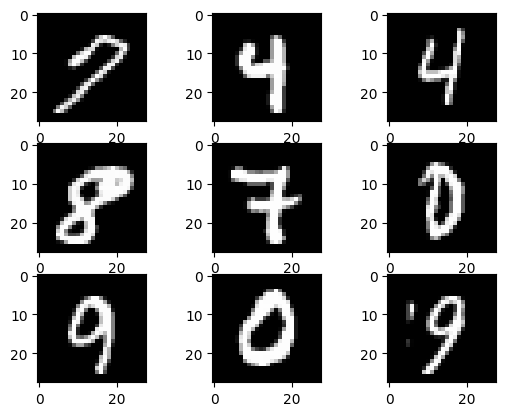

In [102]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(sample[i][0], cmap='gray')
plt.show()

In [103]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [104]:
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [105]:
n_total_steps = len(train_data) #totalsamples/batchsize
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_data):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        #forward
        y_predicted = model.forward(images)
        loss = criterion(y_predicted, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1)%100==0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1/9, step 100/600, loss = 0.4663
epoch 1/9, step 200/600, loss = 0.3200
epoch 1/9, step 300/600, loss = 0.2951
epoch 1/9, step 400/600, loss = 0.2458
epoch 1/9, step 500/600, loss = 0.2459
epoch 1/9, step 600/600, loss = 0.2644
epoch 2/9, step 100/600, loss = 0.2279
epoch 2/9, step 200/600, loss = 0.1474
epoch 2/9, step 300/600, loss = 0.2180
epoch 2/9, step 400/600, loss = 0.1189
epoch 2/9, step 500/600, loss = 0.1495
epoch 2/9, step 600/600, loss = 0.2257
epoch 3/9, step 100/600, loss = 0.1759
epoch 3/9, step 200/600, loss = 0.2333
epoch 3/9, step 300/600, loss = 0.1214
epoch 3/9, step 400/600, loss = 0.1477
epoch 3/9, step 500/600, loss = 0.2389
epoch 3/9, step 600/600, loss = 0.0829
epoch 4/9, step 100/600, loss = 0.0738
epoch 4/9, step 200/600, loss = 0.0583
epoch 4/9, step 300/600, loss = 0.1077
epoch 4/9, step 400/600, loss = 0.0476
epoch 4/9, step 500/600, loss = 0.1673
epoch 4/9, step 600/600, loss = 0.1207
epoch 5/9, step 100/600, loss = 0.0986
epoch 5/9, step 200/600, 

In [106]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_data:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100.0 * n_correct/n_samples
    print(f'accuracy = {acc}')
    # testing_example = iter(test_data)
    # img, label = next(testing_example)
    # images = img.reshape(-1, 28*28).to(device)
    # labels = labels.to(device)
    # results = model(images)
    # vals, preds = torch.max(results, 1)
    # for i in range(9):
    #     plt.subplot(3,3,i+1)
    #     plt.imshow(sample[i][0], cmap='gray')
    #     print(preds[i])
    #     print(labels[i])

accuracy = 97.45


7
True label: 7, Predicted label: 7
2
True label: 2, Predicted label: 2
1
True label: 1, Predicted label: 1
0
True label: 0, Predicted label: 0
4
True label: 4, Predicted label: 4
1
True label: 1, Predicted label: 1
4
True label: 4, Predicted label: 4
9
True label: 9, Predicted label: 9
5
True label: 5, Predicted label: 5


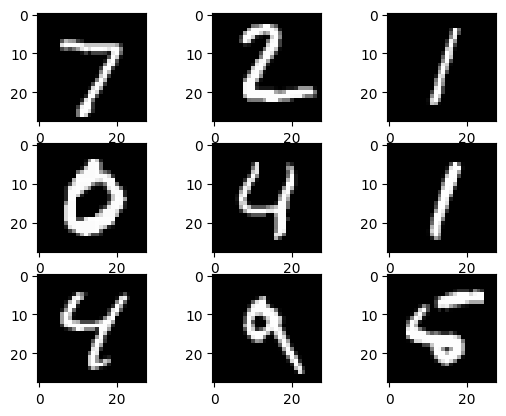

In [107]:
import random
random_index = random.randint(0, len(test_data.dataset) - 1)
for i in range(9):
    random_index = i
    image, label = test_data.dataset[random_index]
    plt.subplot(3,3,i+1)
    plt.imshow(image[0], cmap='gray')
    print(label)
    image = image.reshape(-1, 28*28).to(device)
    with torch.no_grad():
        output = model(image)
        _, predicted_label = torch.max(output, 1)
    predicted_label = predicted_label.item()
    print(f"True label: {label}, Predicted label: {predicted_label}")